In [1]:
import shap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
x = housing.data
y = housing.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train[0]



array([   3.1908    ,   52.        ,    5.        ,    1.0141844 ,
        879.        ,    3.11702128,   37.71      , -122.43      ])

In [3]:
housing.feature_names
'''
각 블록 그룹의
['MedInc', 중위소독
 'HouseAge', 주택 연령
 'AveRooms', 평균 방 수
 'AveBedrms', 평균 침실 수
 'Population', 인구
 'AveOccup', 평균 거주자 수
 'Latitude', 위도
 'Longitude'] 경도
 target: 주택 가격의 중앙값
 '''

"\n각 블록 그룹의\n['MedInc', 중위소독\n 'HouseAge', 주택 연령\n 'AveRooms', 평균 방 수\n 'AveBedrms', 평균 침실 수\n 'Population', 인구\n 'AveOccup', 평균 거주자 수\n 'Latitude', 위도\n 'Longitude'] 경도\n target: 주택 가격의 중앙값\n "

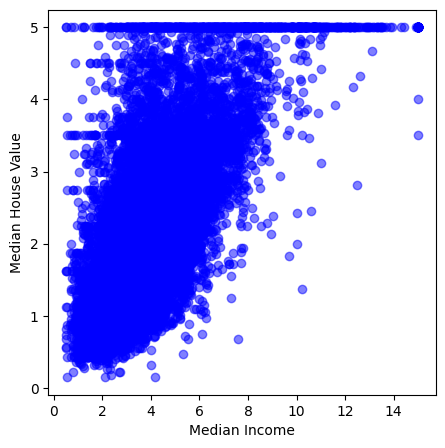

In [4]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
fig, ax1 = plt.subplots(1,1,figsize=(5,5))
ax1.scatter(x_train[:,0], y_train, color='blue', alpha=0.5)
ax1.set_xlabel('Median Income')
ax1.set_ylabel('Median House Value')
plt.show()


In [18]:
import xgboost
import numpy as np
from sklearn.metrics import mean_squared_error
model = xgboost.XGBRegressor(objective='reg:linear')
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}')


RMSE: 0.47


c:\Users\jcj03\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:53:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [19]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values[0], features=x_test[0], feature_names=housing.feature_names)


In [20]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values[:300], features=x_test[:300], feature_names=housing.feature_names)


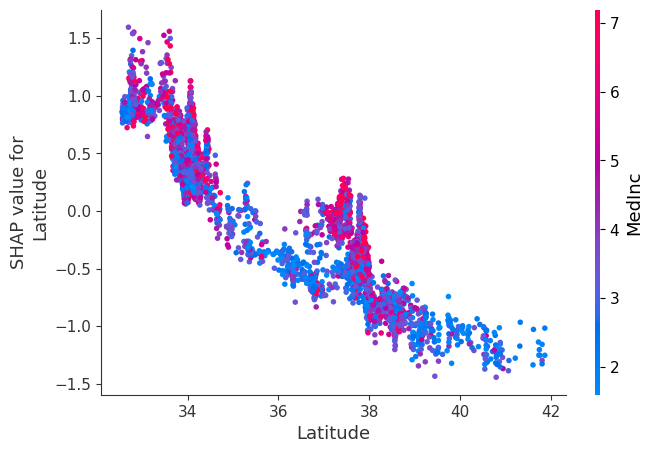

In [21]:
shap.dependence_plot('Latitude', shap_values, x_test, feature_names=housing.feature_names, interaction_index='MedInc')


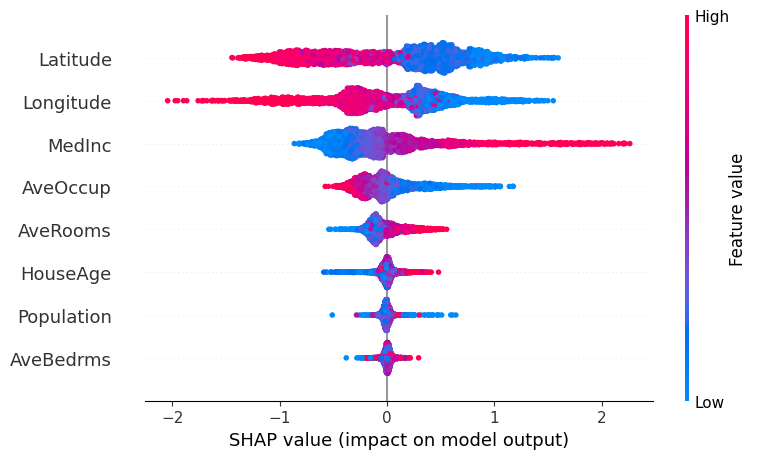

In [22]:
shap.summary_plot(shap_values, x_test, feature_names=housing.feature_names)


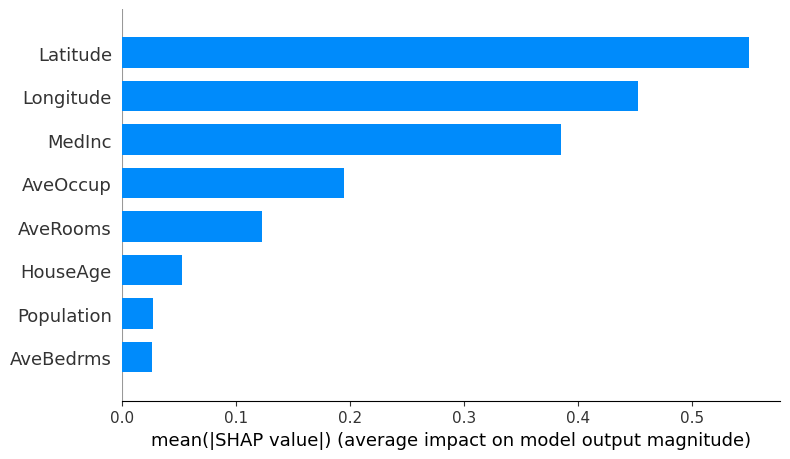

In [23]:
shap.summary_plot(shap_values, x_test, feature_names=housing.feature_names, plot_type='bar')


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

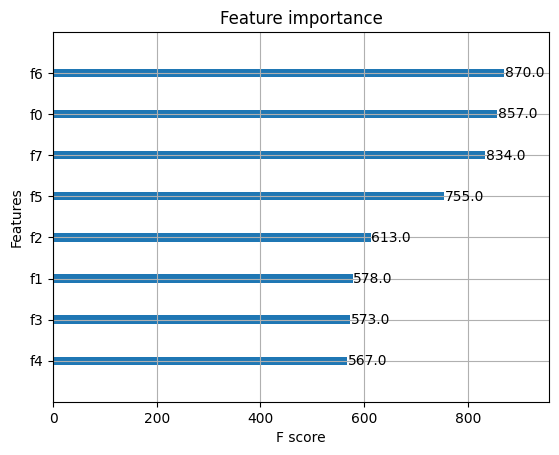

In [28]:
model.feature_names = housing.feature_names
print(model.feature_names)
xgboost.plot_importance(model)
